# Multiple Linear Regression

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

a. Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows. (Use shape and head commands in python). 

b.  Visualize the relationship between the first four features (age, sex, body mass index, average blood pressure) and the response variable using scatterplots.  Comment on the fits.

c.  Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (442 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

d.  Split the data into a training set and a test set.  Use the first 300 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

e.  Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.



## Answer


(a)

In [13]:
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

colNames = [ 'Age', 'Sex', 'BMI', 'ABP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
df = pd.DataFrame(diabetes.data, columns=colNames)
df['Target'] = diabetes.target

feature_sel = [ 'Age', 'Sex', 'BMI', 'ABP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
X = df[feature_sel]
y = df.Target

print(X.shape)
print(X.head())

(442, 10)
        Age       Sex       BMI       ABP        S1        S2        S3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         S4        S5        S6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


(b)

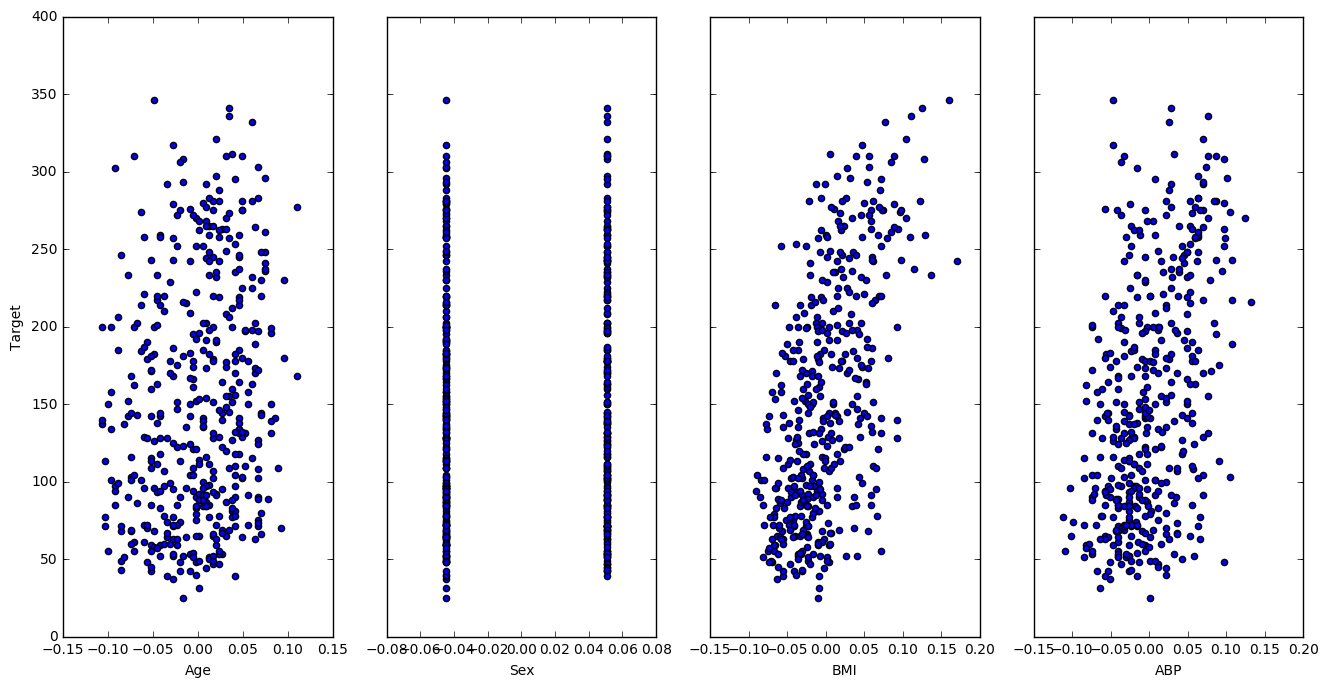

In [66]:
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='Age', y='Target', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Sex', y='Target', ax=axs[1])
df.plot(kind='scatter', x='BMI', y='Target', ax=axs[2])
df.plot(kind='scatter', x='ABP', y='Target', ax=axs[3])

- Little or no correlation between the target and age/sex
- Positive correlation between the target and BMI/average blood pressure.

(c)

In [67]:
clf = linear_model.LinearRegression()
clf.fit(X, y)

# print intercept and coefficients
print 'Intercept: ', clf.intercept_
print 'Coef: ', clf.coef_

predictions = clf.predict(X)
mse = mean_squared_error(y, predictions)
print'MSE: ', mse

Intercept:  152.133484163
Coef:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
MSE:  2859.69039877


(d)

In [68]:
X_train = X.iloc[:300,]
y_train = y.iloc[:300,]

X_test = X.iloc[300:,]
y_test = y.iloc[300:,]

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, y_train)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print 'MSE train: ', mse_train

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print 'MSE test: ', mse_test


MSE train:  2923.0002005
MSE test:  2794.5690145


(e)

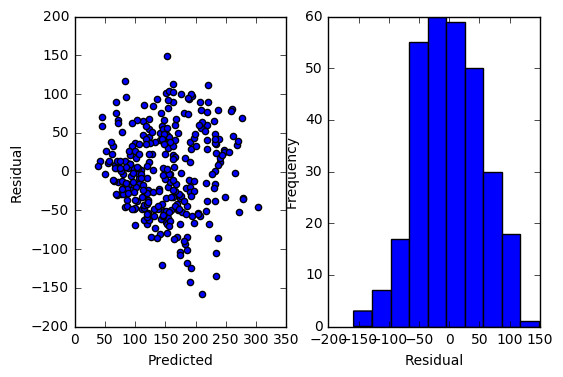

In [75]:
residuals = y_train - predictions_train
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(predictions_train, residuals)
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Residual")
ax2.hist(residuals)
ax2.set_xlabel("Residual")
ax2.set_ylabel("Frequency")

Based on the distribution, the residuals are (approximately) normally distribued, with zero mean.